## Нахождение сложной производной.

In [1]:
import torch

In [2]:
def find_x_derivative(x, y):
    x = torch.tensor(x, dtype=float, requires_grad=True)
    y = torch.tensor(y, dtype=float, requires_grad=True)
    function = torch.sin(torch.tan(x)*(x*x/y) + torch.log( torch.exp(-x*x+3) + x*x*x*y) ) * torch.tan( x*x*(torch.exp(x**9)) )
    function.sum().backward()   
    return x.grad

In [3]:
find_x_derivative(1, 1)

tensor(-16.5969, dtype=torch.float64)

In [4]:
A = torch.randn(3, 3)
A.numpy()
A

tensor([[-0.2740, -0.7018,  1.6649],
        [-1.3856,  1.0756, -0.5704],
        [ 0.7950, -0.1246, -0.5731]])

In [5]:
B = torch.randn(3, 3)
B.numpy()
B

tensor([[-0.2913,  0.6530, -0.2065],
        [-1.5874, -0.0867,  0.7816],
        [ 0.9570,  1.5244,  0.9823]])

In [6]:
find_x_derivative(A, B)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([[-5.9504e-02, -1.9832e+00,  4.4657e+46],
        [ 1.6065e-06,  1.1047e+04, -1.5022e+00],
        [-1.1834e+00, -4.3713e-02, -1.4281e+00]], dtype=torch.float64)

## Нахождение косинусной близости

In [7]:
def get_cos_sim(A, B):
    A = torch.tensor(A, dtype = float)
    B = torch.tensor(B, dtype = float)
    B = B.t()    
    norm_a = torch.norm(A, dim=1)
    norm_b = torch.norm(B, dim=0)
    A = A / norm_a
    B = B / norm_b
    B = B.t()
    return torch.mm(A, B)

In [8]:
A = torch.randn(3, 3)
A.numpy()
A

tensor([[ 2.1696, -0.2847,  2.0447],
        [ 2.1199,  0.6940,  1.5023],
        [ 1.3896,  0.7369,  2.6830]])

In [9]:
B = torch.randn(3, 3)
B.numpy()
B

tensor([[ 0.5072, -1.2791,  1.9336],
        [ 0.5123, -0.4821, -1.6305],
        [-0.3900, -0.3031,  0.9171]])

In [10]:
get_cos_sim(A, B)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([[-0.1219, -0.5530,  1.2663],
        [ 0.0449, -0.5921,  0.7651],
        [-0.1448, -0.5755,  0.8860]], dtype=torch.float64)

## Обучение своей нейронной сети

In [11]:
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch, torchvision
import torch.nn.functional as F
import pandas as pd
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [12]:
train_dataset = torchvision.datasets.FashionMNIST(root='',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

image, label = train_dataset[0]


Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw




Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw




Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw




Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [13]:
test_dataset = torchvision.datasets.FashionMNIST(root='', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

In [14]:
classes = ('Tshirt', 'Trouser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
class FashionCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Sequential(
                nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)
            )    

        self.layer2 = nn.Sequential(
                nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2)
            ) 
        
        
        self.fc1 = nn.Linear(64 * 7 * 7, 600)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)

    def forward(self, x):
        
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [16]:
PATH = 'base_model.pth'

In [17]:
base_net = FashionCNN().to(device)
torch.save(base_net.state_dict(), PATH) #пригодится для сравнения результатов
print(base_net)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=3136, out_features=600, bias=True)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [18]:
net_SGD = FashionCNN().eval().to(device)
net_SGD.load_state_dict(torch.load(PATH))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_SGD.parameters(), lr=0.001, momentum=0.9)

net_SGD.train()
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net_SGD(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 150 == 0: 
            print('[%d, %1d] loss_net_SGD: %.4f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

[1, 1] loss_net_SGD: 0.0023
[1, 151] loss_net_SGD: 0.3455
[1, 301] loss_net_SGD: 0.3449
[1, 451] loss_net_SGD: 0.3436
[1, 601] loss_net_SGD: 0.3284
[1, 751] loss_net_SGD: 0.1585
[1, 901] loss_net_SGD: 0.1240
[2, 1] loss_net_SGD: 0.0006
[2, 151] loss_net_SGD: 0.1147
[2, 301] loss_net_SGD: 0.1110
[2, 451] loss_net_SGD: 0.1074
[2, 601] loss_net_SGD: 0.1046
[2, 751] loss_net_SGD: 0.1002
[2, 901] loss_net_SGD: 0.0985
[3, 1] loss_net_SGD: 0.0006
[3, 151] loss_net_SGD: 0.0955
[3, 301] loss_net_SGD: 0.0944
[3, 451] loss_net_SGD: 0.0920
[3, 601] loss_net_SGD: 0.0900
[3, 751] loss_net_SGD: 0.0865
[3, 901] loss_net_SGD: 0.0845
[4, 1] loss_net_SGD: 0.0008
[4, 151] loss_net_SGD: 0.0811
[4, 301] loss_net_SGD: 0.0804
[4, 451] loss_net_SGD: 0.0793
[4, 601] loss_net_SGD: 0.0765
[4, 751] loss_net_SGD: 0.0758
[4, 901] loss_net_SGD: 0.0751
[5, 1] loss_net_SGD: 0.0004
[5, 151] loss_net_SGD: 0.0704
[5, 301] loss_net_SGD: 0.0747
[5, 451] loss_net_SGD: 0.0694
[5, 601] loss_net_SGD: 0.0693
[5, 751] loss_net_SG

In [19]:
def calc_accuracy(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [20]:
result = {}
result['net_SGD'] = calc_accuracy(net_SGD)

In [21]:
net_Adagrad = FashionCNN().eval().to(device)
net_Adagrad.load_state_dict(torch.load(PATH))

criterion_2 = nn.CrossEntropyLoss()
optimizer_2 = optim.Adagrad(net_Adagrad.parameters(), lr=0.001) 

net_Adagrad.train()
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_2.zero_grad()
        outputs = net_Adagrad(inputs)
        loss = criterion_2(outputs, labels)
        loss.backward()
        optimizer_2.step()
        running_loss += loss.item()
        if i % 150 == 0: 
            print('[%d, %1d] loss_net_Adagard: %.4f' %(epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
result['net_Adagrad'] = calc_accuracy(net_Adagrad)

[1, 1] loss_net_Adagard: 0.0023
[1, 151] loss_net_Adagard: 0.1433
[1, 301] loss_net_Adagard: 0.1049
[1, 451] loss_net_Adagard: 0.0966
[1, 601] loss_net_Adagard: 0.0926
[1, 751] loss_net_Adagard: 0.0895
[1, 901] loss_net_Adagard: 0.0866
[2, 1] loss_net_Adagard: 0.0007
[2, 151] loss_net_Adagard: 0.0842
[2, 301] loss_net_Adagard: 0.0816
[2, 451] loss_net_Adagard: 0.0789
[2, 601] loss_net_Adagard: 0.0793
[2, 751] loss_net_Adagard: 0.0772
[2, 901] loss_net_Adagard: 0.0764
[3, 1] loss_net_Adagard: 0.0005
[3, 151] loss_net_Adagard: 0.0734
[3, 301] loss_net_Adagard: 0.0744
[3, 451] loss_net_Adagard: 0.0753
[3, 601] loss_net_Adagard: 0.0726
[3, 751] loss_net_Adagard: 0.0711
[3, 901] loss_net_Adagard: 0.0700
[4, 1] loss_net_Adagard: 0.0006
[4, 151] loss_net_Adagard: 0.0702
[4, 301] loss_net_Adagard: 0.0680
[4, 451] loss_net_Adagard: 0.0680
[4, 601] loss_net_Adagard: 0.0677
[4, 751] loss_net_Adagard: 0.0673
[4, 901] loss_net_Adagard: 0.0696
[5, 1] loss_net_Adagard: 0.0006
[5, 151] loss_net_Adagar

In [22]:
net_Adam = FashionCNN().eval().to(device)
net_Adam.load_state_dict(torch.load(PATH))   
criterion_3 = nn.CrossEntropyLoss()
optimizer_3 = optim.Adam(net_Adam.parameters(), lr=0.001) 
net_Adam.train()
for epoch in range(5):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer_3.zero_grad()
        outputs = net_Adam(inputs)
        loss = criterion_3(outputs, labels)
        loss.backward()
        optimizer_3.step()
        running_loss += loss.item()
        if i % 150 == 0: 
            print('[%d, %1d] loss_net_Adam: %.4f' %(epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

result['net_Adam'] = calc_accuracy(net_Adam)

[1, 1] loss_net_Adam: 0.0023
[1, 151] loss_net_Adam: 0.1199
[1, 301] loss_net_Adam: 0.0758
[1, 451] loss_net_Adam: 0.0645
[1, 601] loss_net_Adam: 0.0577
[1, 751] loss_net_Adam: 0.0517
[1, 901] loss_net_Adam: 0.0506
[2, 1] loss_net_Adam: 0.0003
[2, 151] loss_net_Adam: 0.0461
[2, 301] loss_net_Adam: 0.0447
[2, 451] loss_net_Adam: 0.0431
[2, 601] loss_net_Adam: 0.0441
[2, 751] loss_net_Adam: 0.0438
[2, 901] loss_net_Adam: 0.0421
[3, 1] loss_net_Adam: 0.0002
[3, 151] loss_net_Adam: 0.0397
[3, 301] loss_net_Adam: 0.0387
[3, 451] loss_net_Adam: 0.0367
[3, 601] loss_net_Adam: 0.0374
[3, 751] loss_net_Adam: 0.0374
[3, 901] loss_net_Adam: 0.0385
[4, 1] loss_net_Adam: 0.0002
[4, 151] loss_net_Adam: 0.0329
[4, 301] loss_net_Adam: 0.0340
[4, 451] loss_net_Adam: 0.0333
[4, 601] loss_net_Adam: 0.0347
[4, 751] loss_net_Adam: 0.0353
[4, 901] loss_net_Adam: 0.0326
[5, 1] loss_net_Adam: 0.0004
[5, 151] loss_net_Adam: 0.0312
[5, 301] loss_net_Adam: 0.0315
[5, 451] loss_net_Adam: 0.0312
[5, 601] loss_net_

In [23]:
pd.DataFrame.from_dict(result, orient='index', columns = ['accuracy_test'])

,accuracy_test
net_SGD,0.8254
net_Adagrad,0.8370
net_Adam,0.9071


In [24]:
data_iter = iter(test_loader)
images, labels = data_iter.next()
images, labels = images.to(device), labels.to(device)

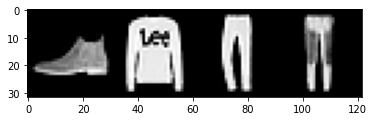

In [25]:
outputs = net_Adam(images)
img = torchvision.utils.make_grid(images)
img.permute(1, 2, 0).cpu().numpy()

plt.imshow(img.permute(1, 2, 0).cpu().numpy())
plt.show()

In [26]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%s' % classes[predicted[i]]for i in range(4)))

Predicted:  AnkleBoot Pullover Trouser Trouser
